<a href="https://colab.research.google.com/github/arpanavvari/Housing-Data-Analysis/blob/main/Housing_data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [5]:
Monthdf = pd.read_csv('housing_in_london_monthly_variables.csv')
Yeardf = pd.read_csv('housing_in_london_yearly_variables.csv')

In [6]:
print("The dataset 1 which has information about london housing in monthly format: ")
Monthdf

The dataset 1 which has information about london housing in monthly format: 


,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1/1/1995,city of london,91449,E09000001,17.0,NaN,1
1,2/1/1995,city of london,82203,E09000001,7.0,NaN,1
2,3/1/1995,city of london,79121,E09000001,14.0,NaN,1
3,4/1/1995,city of london,77101,E09000001,7.0,NaN,1
4,5/1/1995,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN,0
13545,10/1/2019,england,249376,E92000001,68677.0,NaN,0
13546,11/1/2019,england,248515,E92000001,67814.0,NaN,0
13547,12/1/2019,england,250410,E92000001,NaN,NaN,0


In [7]:
print("The dataset 2 which has some more information about london housing in yearly format: ")
Yeardf
print(Yeardf.isnull().sum())

The dataset 2 which has some more information about london housing in yearly format: 
code                   0
area                   0
date                   0
median_salary         22
life_satisfaction    719
mean_salary            0
recycling_pct        211
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
dtype: int64


In [8]:
Monthdf['year'] = pd.DatetimeIndex(Monthdf['date']).year
Yeardf['year'] = pd.DatetimeIndex(Yeardf['date']).year

In [9]:
Monthdf.drop('date',axis=1,inplace=True)
Yeardf.drop('date',axis=1,inplace=True)

In [10]:
yr1=np.arange(1995,2001)
yr2=np.arange(2019,2021)
years_to_remove=np.append(yr1,yr2)
codes_to_remove = ['E13000001', 'E13000002', 'E92000001', 'K02000001', 'K03000001', 'K04000001', 'N92000002', 'S92000003', 'W92000004']

In [11]:
Monthdf=Monthdf[Monthdf.code.isin(codes_to_remove)==False]
Yeardf=Yeardf[Yeardf.code.isin(codes_to_remove)==False]
#City codes which are not in London are removed

In [12]:
Monthdf=Monthdf[Monthdf.year.isin(years_to_remove)==False]
Yeardf=Yeardf[Yeardf.year.isin(years_to_remove)==False]
#Removing incomplete old data,to deal with only the complete and latest data

Data Manuplition

In [13]:
Monthdf["total_price"]= Monthdf["average_price"]* Monthdf["houses_sold"]

<ipython-input-13-1bf3445ebaee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Monthdf["total_price"]= Monthdf["average_price"]* Monthdf["houses_sold"]


In [14]:
newMonthdf = Monthdf.groupby(['year','code']).aggregate({'total_price': 'sum', 'no_of_crimes': 'sum','houses_sold':'sum'}).round(2)
#Performed group by operation to aggregate month values to year

In [15]:
newMonthdf['new_average_price']=newMonthdf['total_price']/newMonthdf['houses_sold']
newMonthdf.drop('total_price',axis=1,inplace=True)
#Calculated average prices by calculating total price and then dividing by total number of houses to get accurate avergae price

In [16]:
newMonthdf['new_average_price']=newMonthdf['new_average_price'].round(2)
newMonthdf['no_of_crimes']=newMonthdf['no_of_crimes'].astype(int)
newMonthdf['houses_sold']=newMonthdf['houses_sold'].astype(int)

In [17]:
HousingAll= Yeardf.merge(newMonthdf,left_on=['year','code'],right_on= ['year','code'] )
#Performed merge to combine both the data sets

In [18]:
HousingAll

,code,area,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,no_of_crimes,houses_sold,new_average_price
0,E09000001,city of london,39104.0,NaN,62819,0,7359.0,339000.0,315.0,5009.0,1,2001,0,367,237050.55
1,E09000002,barking and dagenham,22323.0,NaN,26050,3,165654.0,54000.0,3780.0,68298.0,1,2001,20476,3203,88813.38
2,E09000003,barnet,20916.0,NaN,26068,8,319481.0,138000.0,8675.0,130515.0,1,2001,28059,6803,185730.54
3,E09000004,bexley,20217.0,NaN,23559,20,218757.0,75000.0,6429.0,91606.0,1,2001,20224,5270,117150.82
4,E09000005,brent,21878.0,NaN,24164,7,269620.0,116000.0,4323.0,101427.0,1,2001,29829,4725,157811.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,E12000005,west midlands,27682.0,7.70,33067,40,5900757.0,2960000.0,NaN,NaN,0,2018,0,63525,189825.83
752,E12000006,east,29153.0,NaN,34939,49,6201214.0,3257000.0,NaN,NaN,0,2018,0,99586,290770.79
753,E12000007,london,38146.0,7.58,52629,33,8908081.0,6148000.0,159471.0,3556161.0,0,2018,0,89797,477963.59
754,E12000008,south east,30849.0,7.79,37020,47,9133625.0,4937000.0,NaN,NaN,0,2018,0,145323,323654.60


Data Cleaning

In [19]:
salary_cols = ["mean_salary"]
HousingAll[salary_cols] = HousingAll[salary_cols].replace({'-':np.NaN, '#':np.NaN, '':np.NaN})
##Changed undefined values to NaN
###################################################################
nocrime_cols = ["no_of_crimes"]

In [20]:

Housing=HousingAll[HousingAll['borough_flag']==1]
#Borough flag is 1 for areas of London and is 0 for rows which are an aggregation of other areas. Hence extracted rows with only borough 1

In [21]:
Housing.reset_index(inplace=True)


In [22]:
pd.options.display.max_rows = 10000

In [23]:
print("The final dataset after extraction, manipulation and cleaning is ")
Housing

The final dataset after extraction, manipulation and cleaning is 


,index,code,area,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,no_of_crimes,houses_sold,new_average_price
0,0,E09000001,city of london,39104.0,NaN,62819,0,7359.0,339000.0,315.0,5009.0,1,2001,0,367,237050.55
1,1,E09000002,barking and dagenham,22323.0,NaN,26050,3,165654.0,54000.0,3780.0,68298.0,1,2001,20476,3203,88813.38
2,2,E09000003,barnet,20916.0,NaN,26068,8,319481.0,138000.0,8675.0,130515.0,1,2001,28059,6803,185730.54
3,3,E09000004,bexley,20217.0,NaN,23559,20,218757.0,75000.0,6429.0,91606.0,1,2001,20224,5270,117150.82
4,4,E09000005,brent,21878.0,NaN,24164,7,269620.0,116000.0,4323.0,101427.0,1,2001,29829,4725,157811.22
5,5,E09000006,bromley,15684.0,NaN,19749,14,296218.0,114000.0,15013.0,128717.0,1,2001,26629,7522,162847.17
6,6,E09000007,camden,27386.0,NaN,40033,12,202567.0,294000.0,2179.0,93112.0,1,2001,46714,3590,279141.42
7,7,E09000008,croydon,20889.0,NaN,23994,12,335112.0,156000.0,8650.0,141300.0,1,2001,34547,6912,133153.72
8,8,E09000009,ealing,23862.0,NaN,29516,13,307276.0,134000.0,5554.0,120331.0,1,2001,33955,6037,170783.65
9,9,E09000010,enfield,24136.0,NaN,27605,13,277266.0,111000.0,8220.0,112948.0,1,2001,26527,7073,136529.19


In [24]:
print(Housing['life_satisfaction'].isnull().sum())

338


In [25]:
nocrime_cols = ["no_of_crimes"]
Housing[nocrime_cols] = Housing[nocrime_cols].replace({0:np.NaN})
print(Housing['no_of_crimes'].isnull().sum())


17


<ipython-input-25-2023a6de6d04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Housing[nocrime_cols] = Housing[nocrime_cols].replace({0:np.NaN})


In [26]:
print(Housing.isnull().sum().sum())

368


In [27]:
nocrime_cols = ["no_of_crimes"]
Housing[nocrime_cols] = Housing[nocrime_cols].replace({0:np.NaN})
print(Housing['no_of_crimes'].isnull().sum())

17


<ipython-input-27-2023a6de6d04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Housing[nocrime_cols] = Housing[nocrime_cols].replace({0:np.NaN})


Question 1 : Which areas have the highest and the lowest growth in terms of price of the house in the last 10 years?

In [34]:
area_year=Housing.pivot_table('new_average_price',index='area',columns='year')
#Using pivot table to extract required information
area_year.to_csv('area_year.csv')
area_yr=pd.read_csv('area_year.csv')

area_yr['change']=area_yr['2018']-area_yr['2008']
#Calculating change in prices
highest=area_yr[area_yr['change']==area_yr['change'].max()]
lowest=area_yr[area_yr['change']==area_yr['change'].min()]
print("The area which has the highest growth from 2008 to 2018 is ",highest['area'].iloc[0])
print("The area which has the lowest growth from 2008 to 2018 is ",lowest['area'].iloc[0])

The area which has the highest growth from 2008 to 2018 is  kensington and chelsea
The area which has the lowest growth from 2008 to 2018 is  barking and dagenham


In [36]:
area_year.to_csv('area_year.csv')
#we need to remove this
#we need to remove this

area_yr=pd.read_csv('area_year.csv')
## do we need to put this into excel, cant we use it direclty
## do we need to put this into excel, cant we use it direclty

In [37]:
area_yr['change']=area_yr['2018']-area_yr['2008']
#Calculating change in prices

In [38]:
highest=area_yr[area_yr['change']==area_yr['change'].max()]


Question 2: What areas have the highest number of houses sold in the latest year? #Top5

In [40]:
houses=Housing[Housing['year']==2018].pivot_table('houses_sold',index='area', columns='year')

houses.to_csv('houses.csv')
#Do we need to create a new excel sheet

houses_2018=pd.read_csv('houses.csv')

top5=houses_2018.sort_values(by='2018',ascending=False,ignore_index=True).head(5)

In [41]:
top5

,area,2018
0,wandsworth,4731
1,bromley,4643
2,croydon,4183
3,barnet,3911
4,southwark,3607


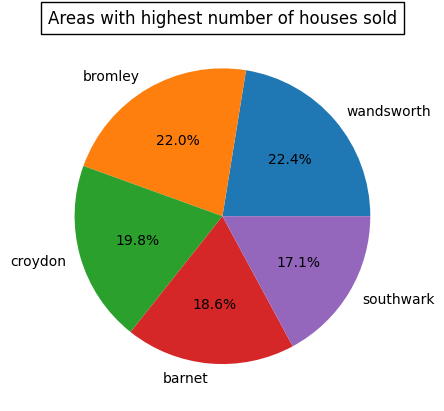

In [42]:
plt.title("Areas with highest number of houses sold",bbox={'facecolor':'1', 'pad':5})
plt.pie(top5["2018"], labels = top5["area"],autopct='%1.1f%%')
plt.show()

Question 3 : Which areas have the highest crime rates in the latest year?

In [43]:
df=Housing[Housing['year']==2018]
Y = ["no_of_crimes"]
df[Y] = df[Y].replace({0:np.NaN})


<ipython-input-43-02f1473523b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Y] = df[Y].replace({0:np.NaN})


In [44]:
df['crime_rate']=(df['no_of_crimes']/df['population_size'])*100
#Calculated crime rate for every area for 2018

<ipython-input-44-0f35968d4274>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crime_rate']=(df['no_of_crimes']/df['population_size'])*100


In [45]:

Housing[nocrime_cols] = Housing[nocrime_cols].replace({0:np.NaN})
print(Housing['no_of_crimes'].isnull().sum())


17


<ipython-input-45-529432790dce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Housing[nocrime_cols] = Housing[nocrime_cols].replace({0:np.NaN})


In [46]:
highest_crimerates=df.sort_values(by='crime_rate',ascending=False,ignore_index=True).head(5)

In [47]:
highest_crimerates[['area','crime_rate']]

,area,crime_rate
0,westminster,24.718789
1,kensington and chelsea,14.126392
2,camden,13.596669
3,islington,12.039290
4,hammersmith and fulham,11.933062


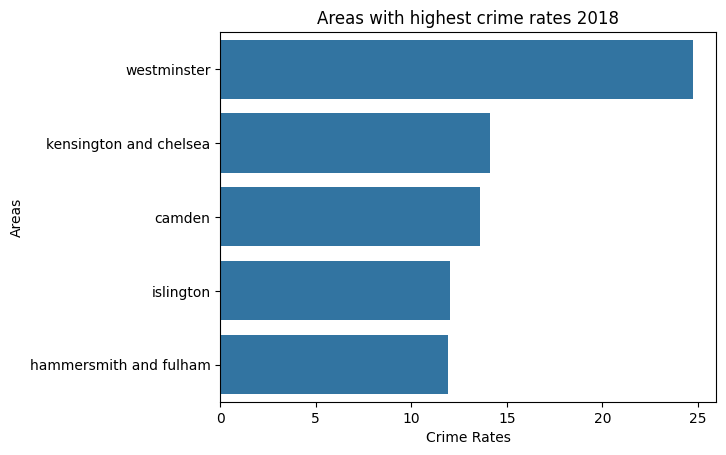

In [48]:
ax=plt.subplot()
ax=sns.barplot(x='crime_rate',y='area',data=highest_crimerates)

ax.set_title('Areas with highest crime rates 2018')
ax.set_xlabel('Crime Rates')
ax.set_ylabel('Areas')
plt.show()

Question 4 : Compare average prices and lifesatisfaction of the areas Barnet and Croydon

In [49]:
from matplotlib.ticker import FormatStrFormatter

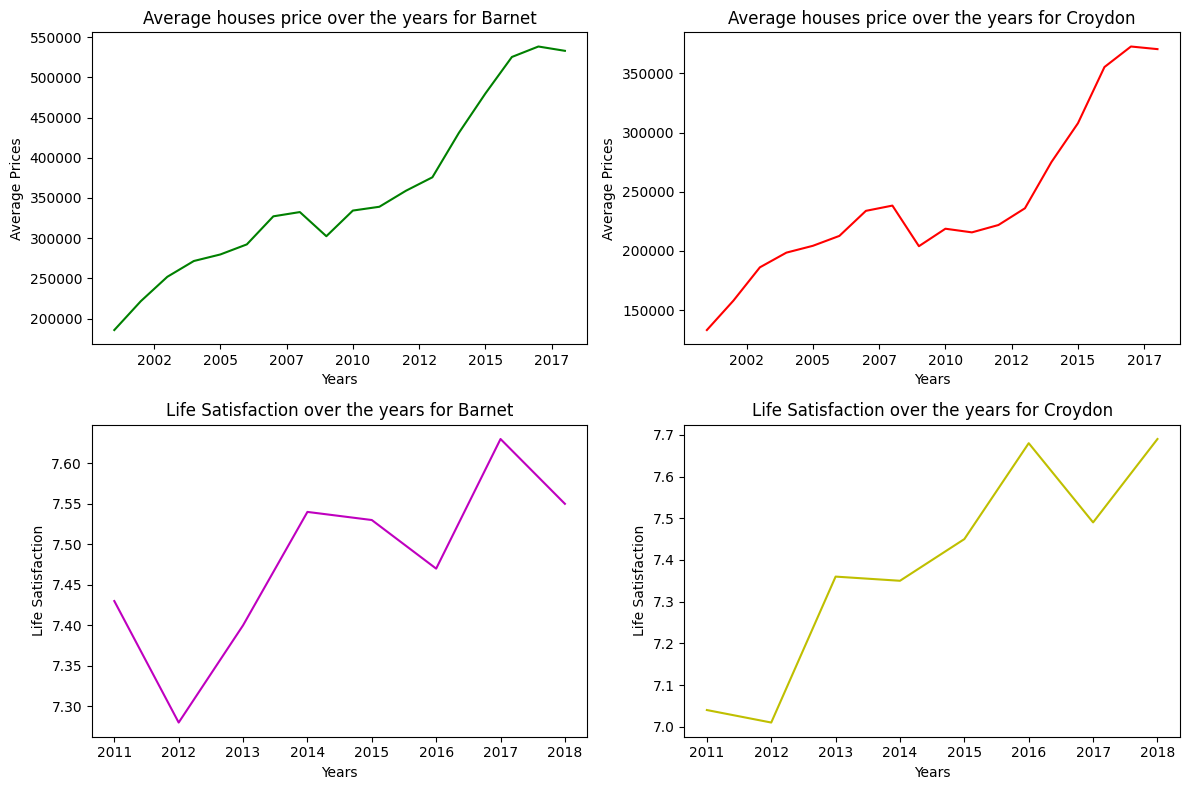

In [50]:
dataset1=Housing[Housing['area']=='barnet']
dataset2=Housing[Housing['area']=='croydon']

fig=plt.figure(figsize=(12,8))
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

axes1.plot(dataset1['year'],dataset1['new_average_price'],'g')
axes1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes2.plot(dataset2['year'],dataset2['new_average_price'],'r')
axes2.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes3.plot(dataset1['year'],dataset1['life_satisfaction'],'m')
axes4.plot(dataset2['year'],dataset2['life_satisfaction'],'y')

axes1.set_title("Average houses price over the years for Barnet")
axes2.set_title("Average houses price over the years for Croydon")
axes3.set_title("Life Satisfaction over the years for Barnet")
axes4.set_title("Life Satisfaction over the years for Croydon")

axes1.set_xlabel("Years")
axes1.set_ylabel("Average Prices")

axes2.set_xlabel("Years")
axes2.set_ylabel("Average Prices")

axes3.set_xlabel("Years")
axes3.set_ylabel("Life Satisfaction")

axes4.set_xlabel("Years")
axes4.set_ylabel("Life Satisfaction")

fig.tight_layout()



Question 5 : Do number of crimes and mean salary affect the average price of the house?

In [51]:
Housing['mean_salary']=Housing['mean_salary'].astype(float)

<ipython-input-51-eb09c3a0c115>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Housing['mean_salary']=Housing['mean_salary'].astype(float)


In [52]:
Housing

,index,code,area,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,no_of_crimes,houses_sold,new_average_price
0,0,E09000001,city of london,39104.0,NaN,62819.0,0,7359.0,339000.0,315.0,5009.0,1,2001,NaN,367,237050.55
1,1,E09000002,barking and dagenham,22323.0,NaN,26050.0,3,165654.0,54000.0,3780.0,68298.0,1,2001,20476.0,3203,88813.38
2,2,E09000003,barnet,20916.0,NaN,26068.0,8,319481.0,138000.0,8675.0,130515.0,1,2001,28059.0,6803,185730.54
3,3,E09000004,bexley,20217.0,NaN,23559.0,20,218757.0,75000.0,6429.0,91606.0,1,2001,20224.0,5270,117150.82
4,4,E09000005,brent,21878.0,NaN,24164.0,7,269620.0,116000.0,4323.0,101427.0,1,2001,29829.0,4725,157811.22
5,5,E09000006,bromley,15684.0,NaN,19749.0,14,296218.0,114000.0,15013.0,128717.0,1,2001,26629.0,7522,162847.17
6,6,E09000007,camden,27386.0,NaN,40033.0,12,202567.0,294000.0,2179.0,93112.0,1,2001,46714.0,3590,279141.42
7,7,E09000008,croydon,20889.0,NaN,23994.0,12,335112.0,156000.0,8650.0,141300.0,1,2001,34547.0,6912,133153.72
8,8,E09000009,ealing,23862.0,NaN,29516.0,13,307276.0,134000.0,5554.0,120331.0,1,2001,33955.0,6037,170783.65
9,9,E09000010,enfield,24136.0,NaN,27605.0,13,277266.0,111000.0,8220.0,112948.0,1,2001,26527.0,7073,136529.19


In [53]:
rows_count = Housing.shape[0]
rows_count

594

In [54]:
dropna = Housing.apply (pd.to_numeric, errors='coerce')
dropna = Housing.dropna(axis = 0)

In [55]:
rows_count = dropna.shape[0]
rows_count

249

6. Performing multi Regression Analysis

In [56]:
housing_model = smf.ols(formula = 'new_average_price ~ no_of_crimes+mean_salary',
                        data=dropna)
#Performing multi regression

In [57]:
result = housing_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      new_average_price   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     17.77
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           6.18e-08
Time:                        21:40:20   Log-Likelihood:                -3393.9
No. Observations:                 249   AIC:                             6794.
Df Residuals:                     246   BIC:                             6804.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.268e+05   5.75e+04      2.203   